In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import signal
from scipy.optimize import leastsq

%matplotlib inline

In [2]:
actuarial_df = pd.read_csv('Actuarial_Project_2.csv')
john_li_predictions = pd.read_csv('john_li_predictions.csv',index_col=0)
john_non_li_predictions = pd.read_csv('john_non_li_predictions.csv',index_col=0)
print(list(john_li_predictions.loc['AK',:]))

[31755.02333, 51987.699999999997, 39243.146670000002, 41645.54333, 42018.036670000001, 39005.633330000004, 49976.879999999997, 53956.099999999999, 50954.220000000001, 67209.529999999999, 63625.889999999999, 50108.654999999999, 32454.038329999999, 56330.525000000001, 36877.756669999995, 42913.248330000002, 39742.361669999998, 39988.288330000003, 53785.605000000003]


In [3]:
#print(john_li_predictions[['CA']])
#print(john_li_predictions.index)
#[[State,[Li],[Non_li]],...etc]
state = list(actuarial_df.STATE)
income = list(actuarial_df.loc[:,'LOW INCOME IND'])
allowed_amt = list(actuarial_df.loc[:,'ALLOWED AMT'])

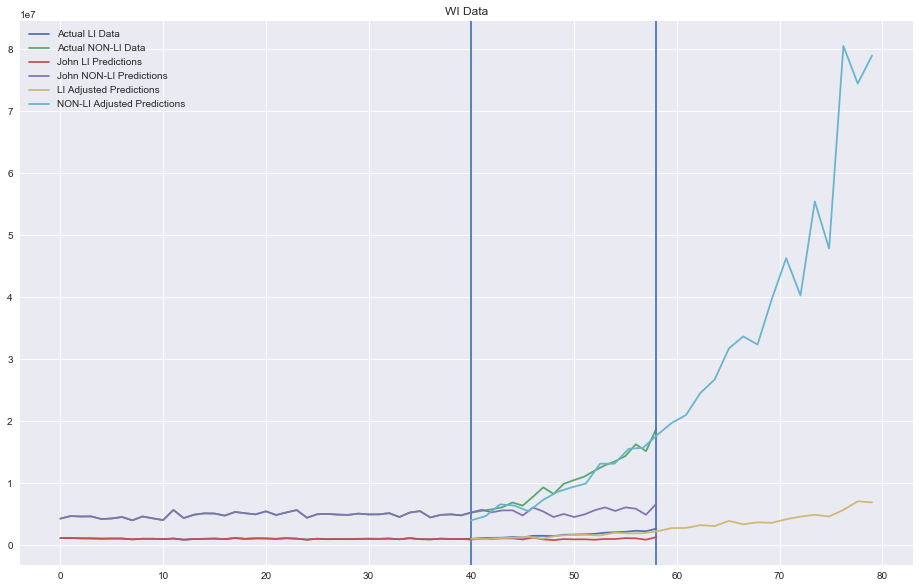

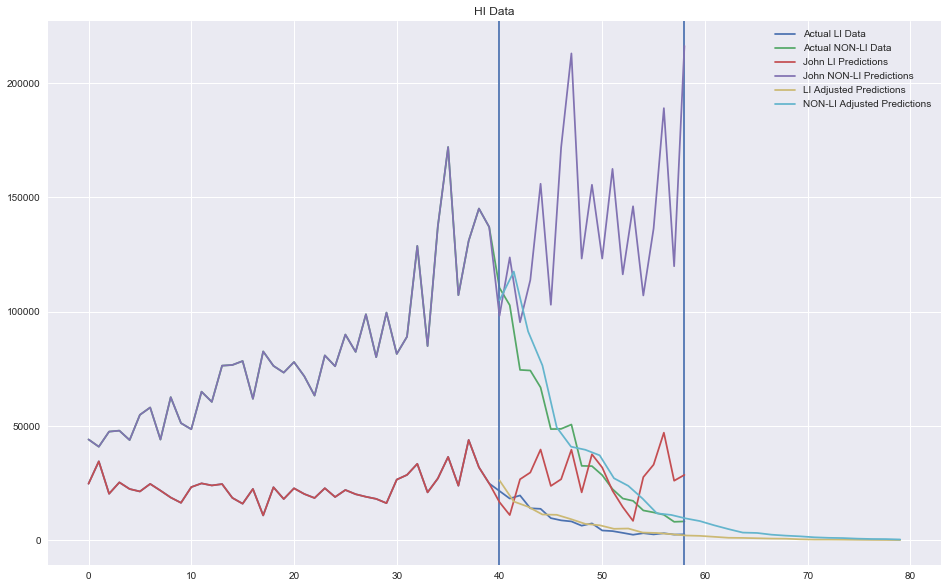

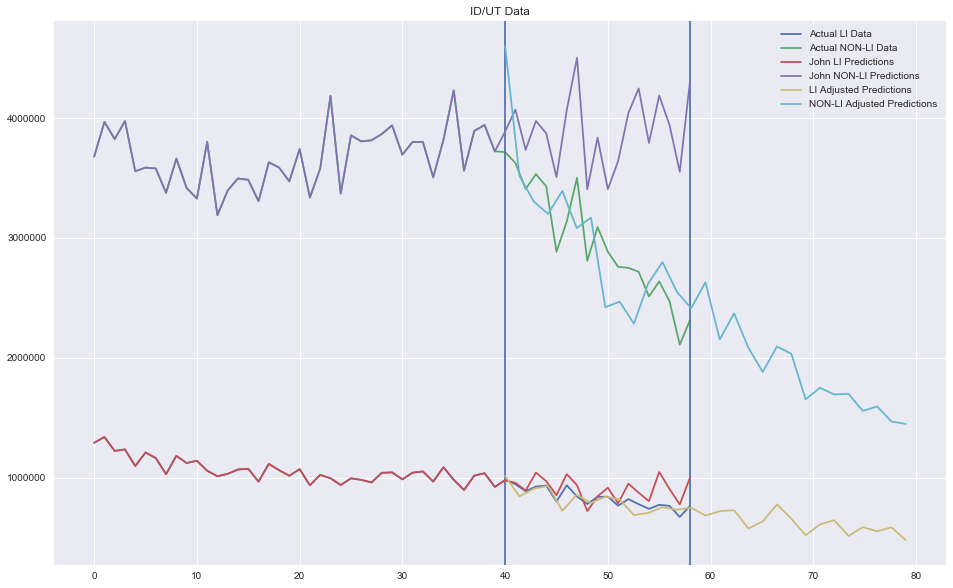

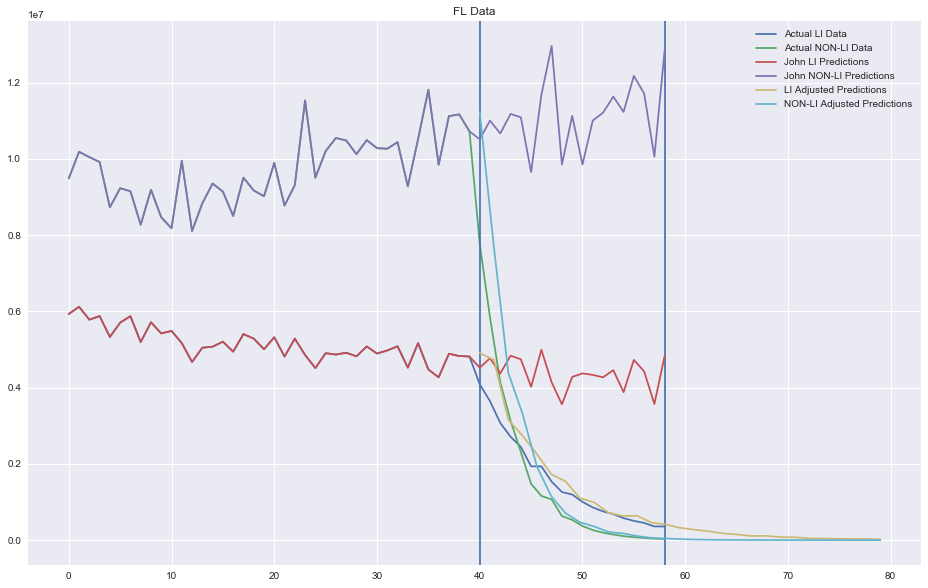

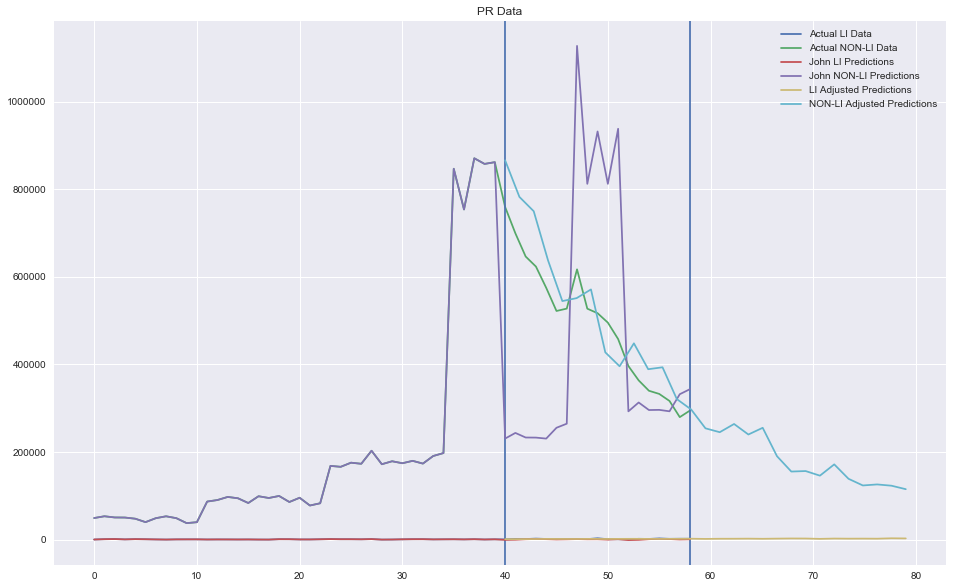

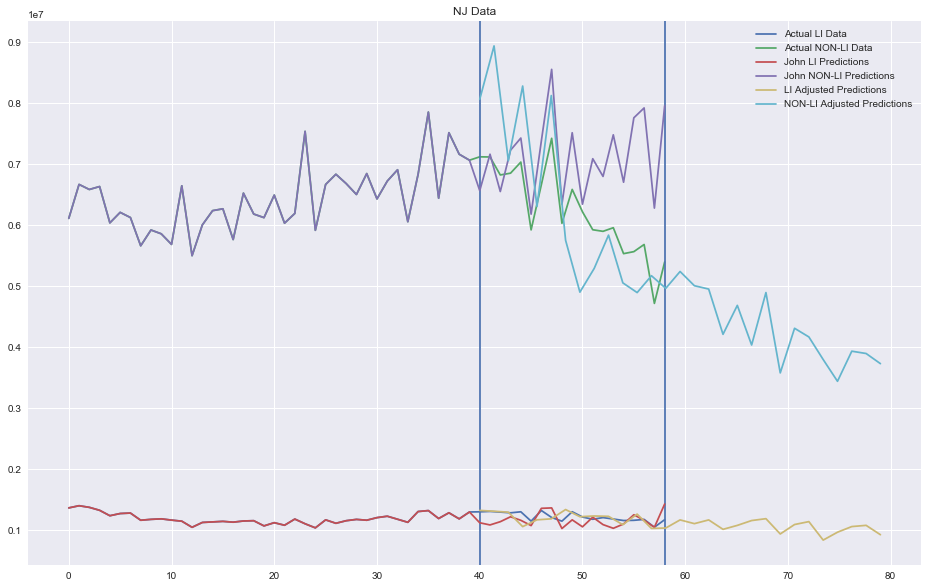

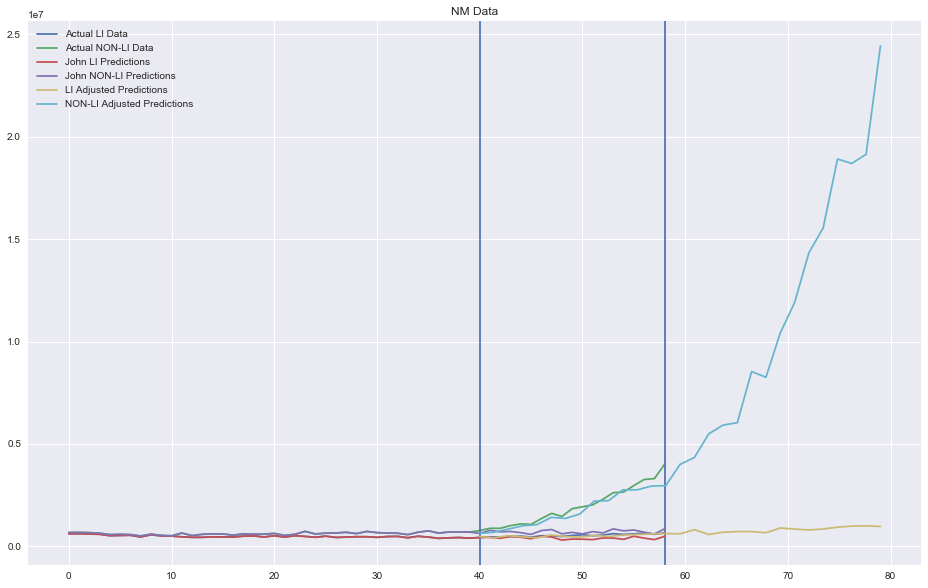

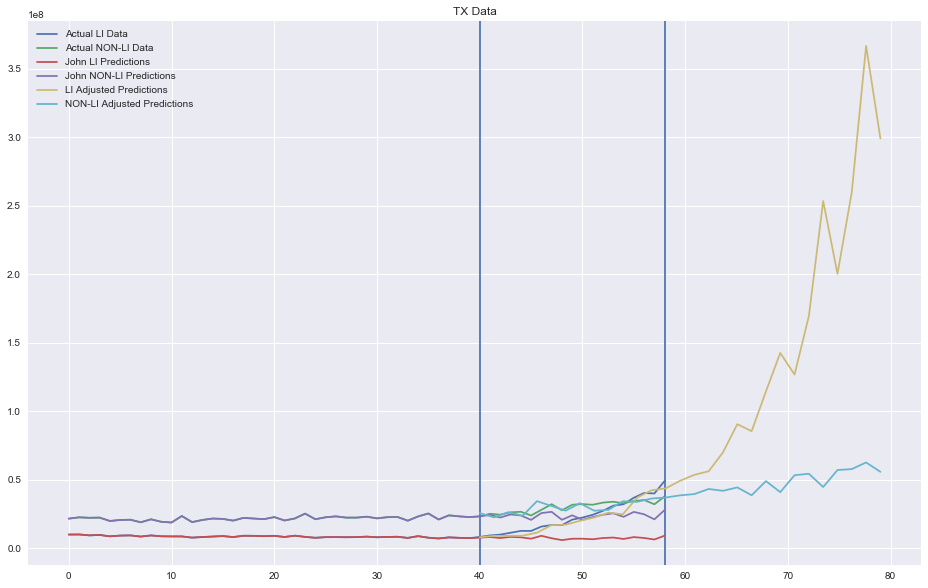

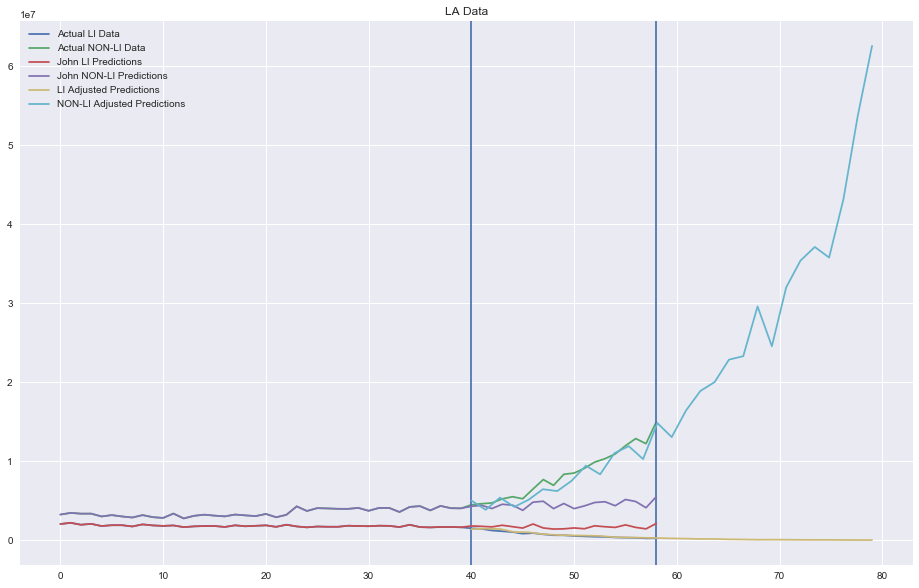

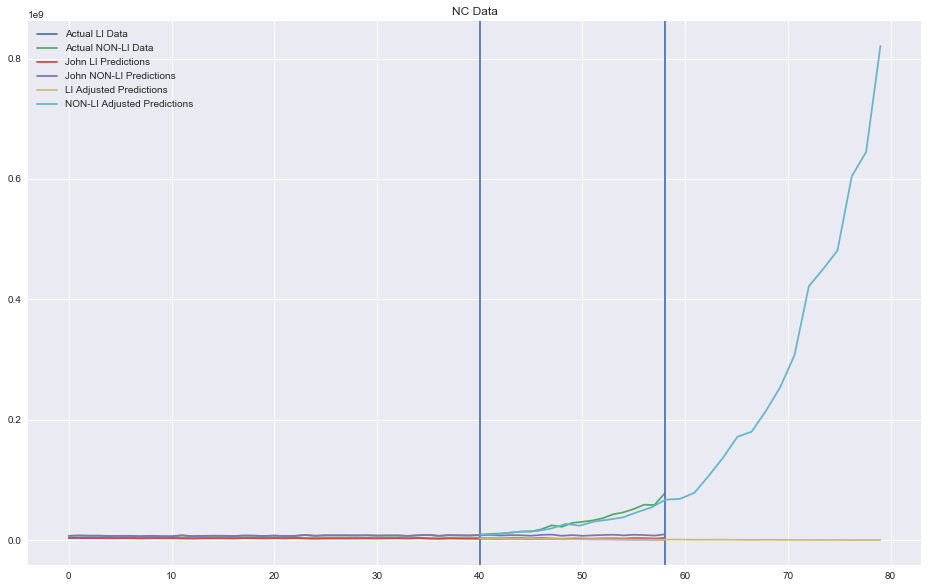

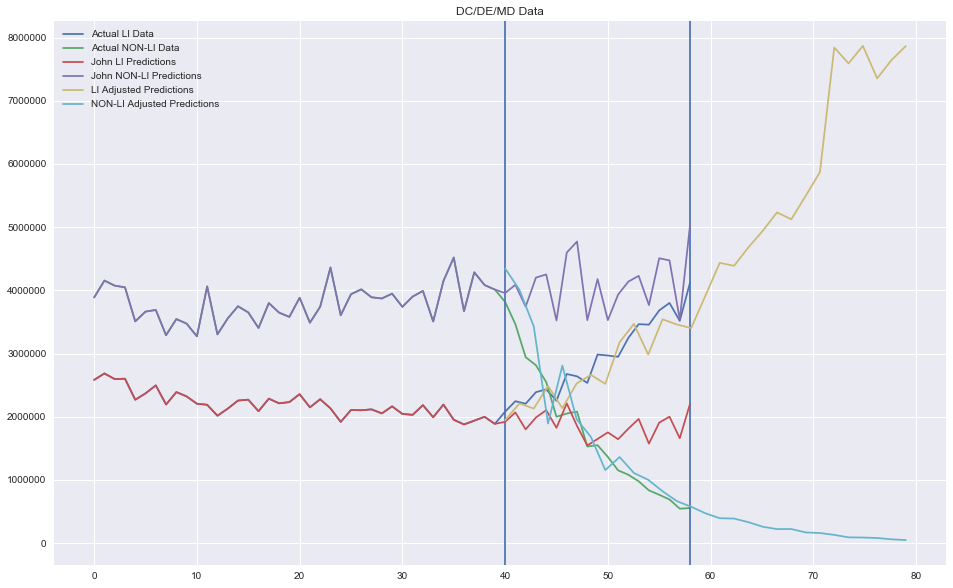

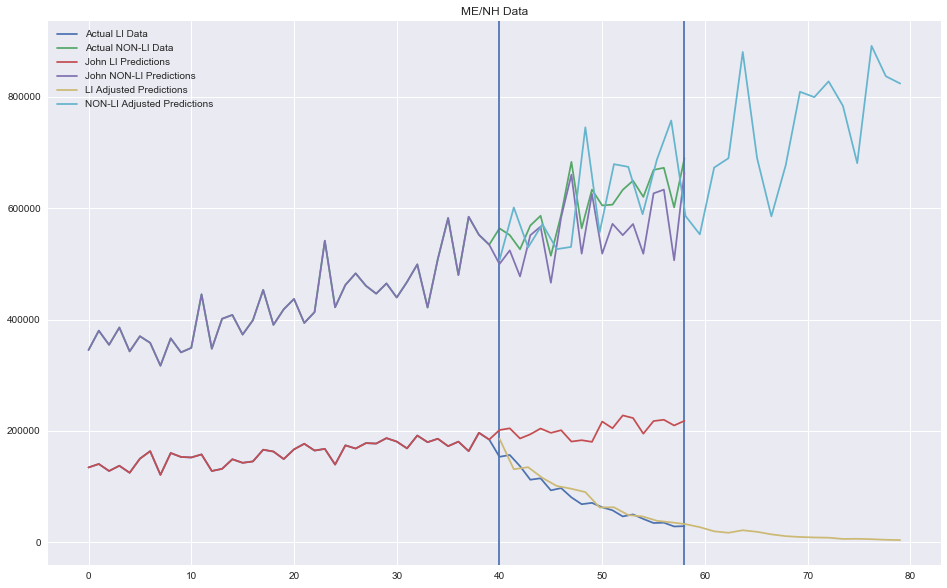

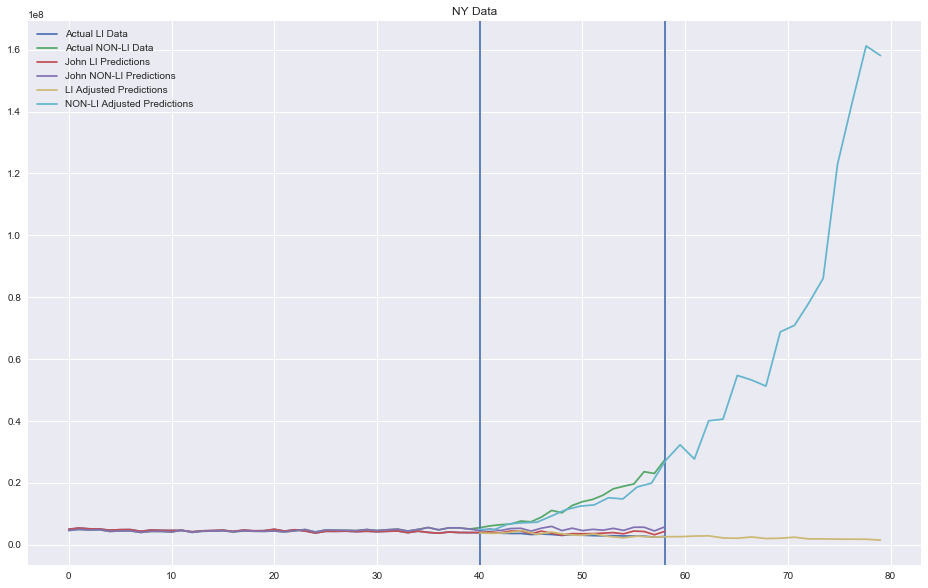

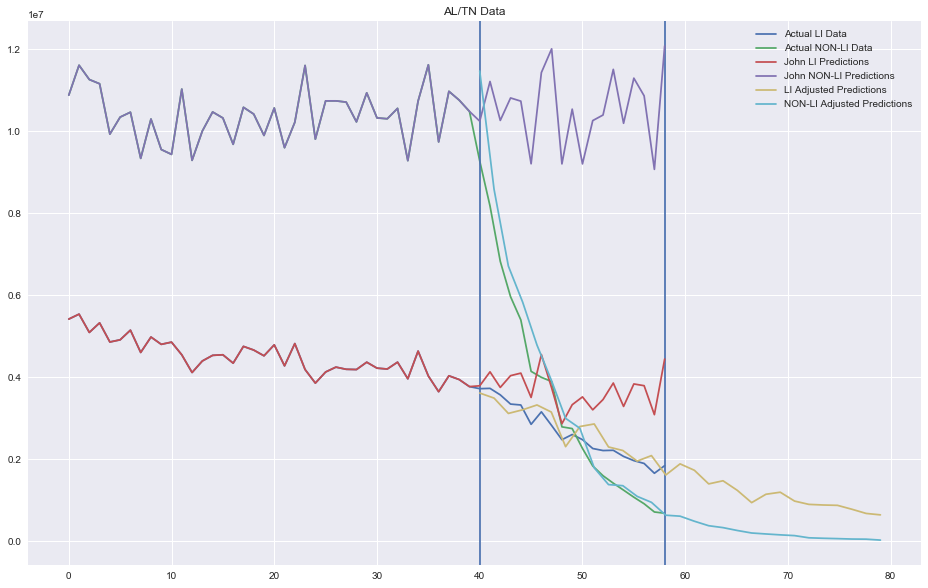

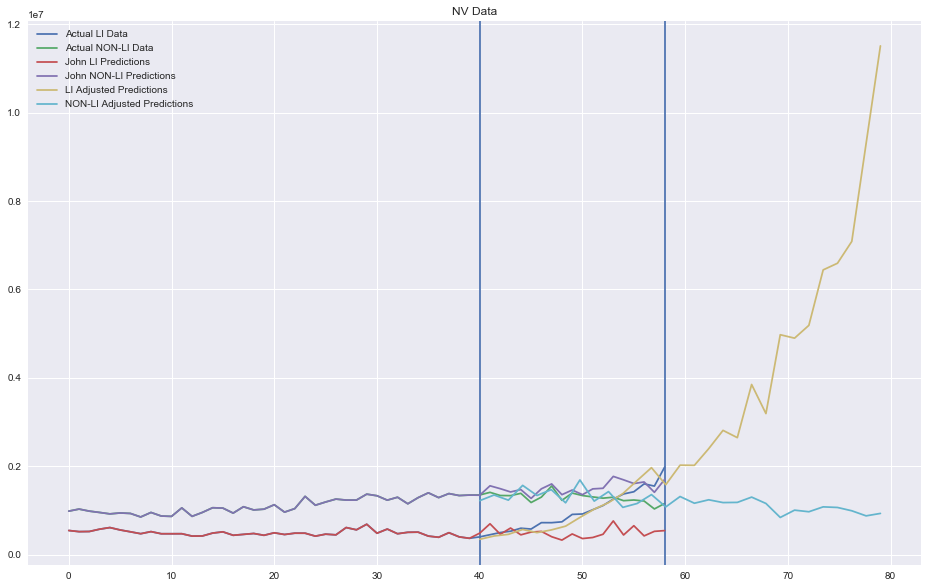

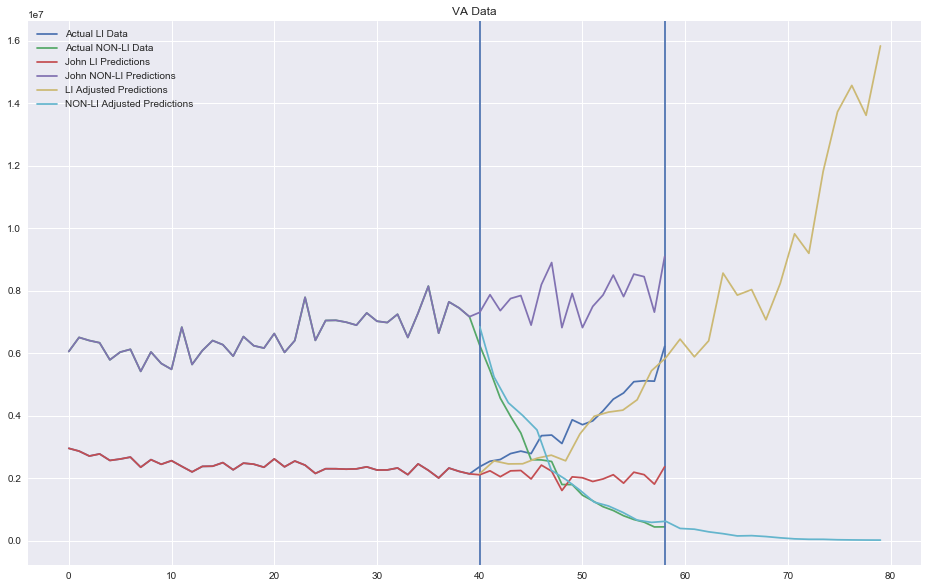

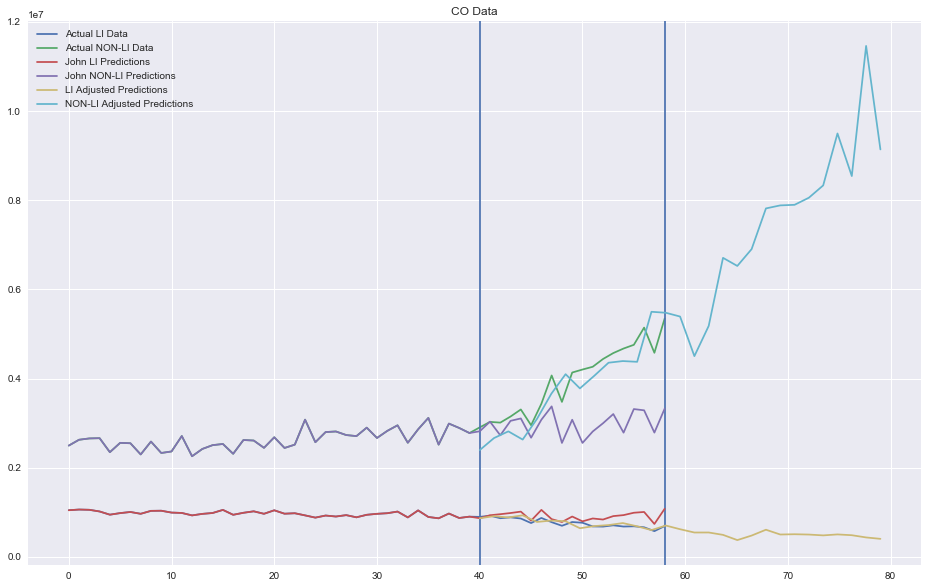

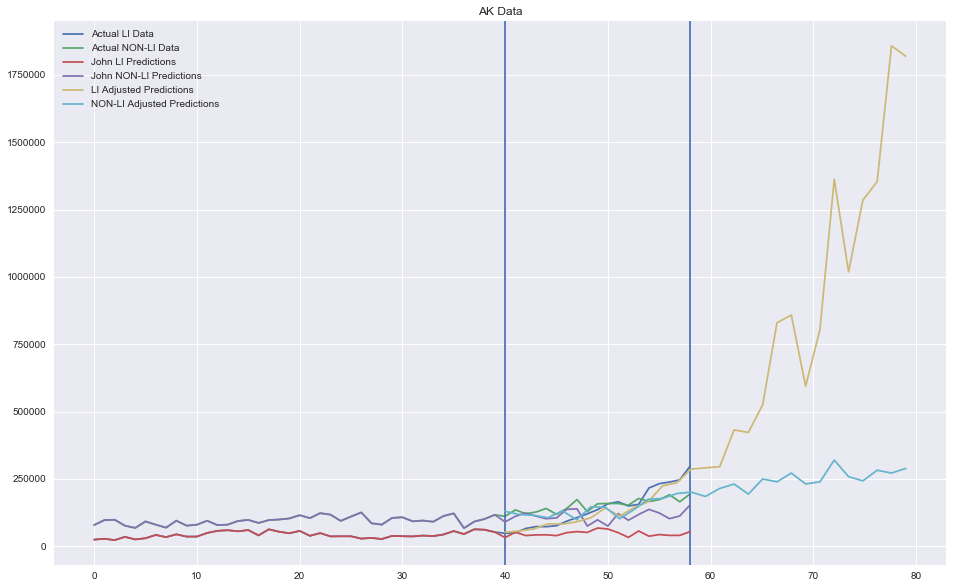

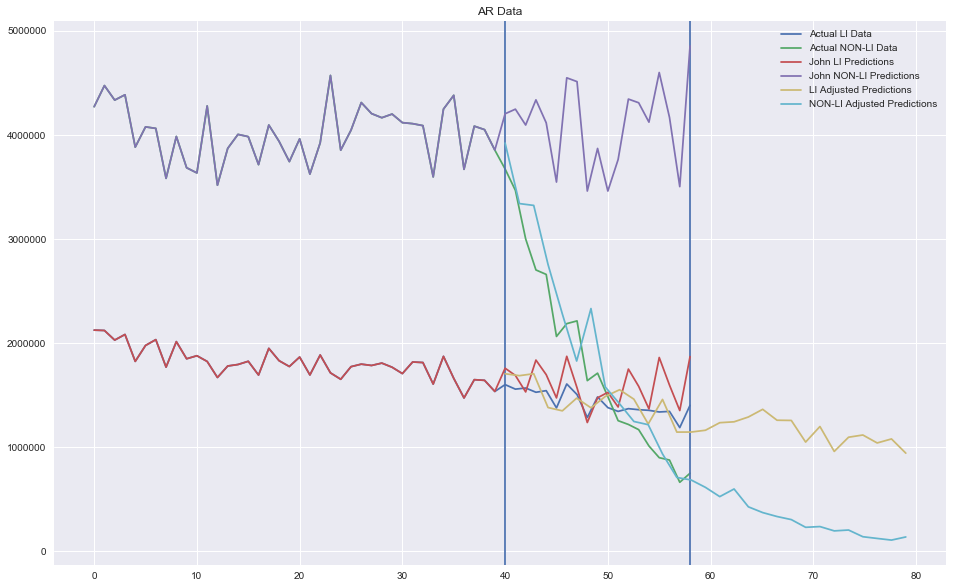

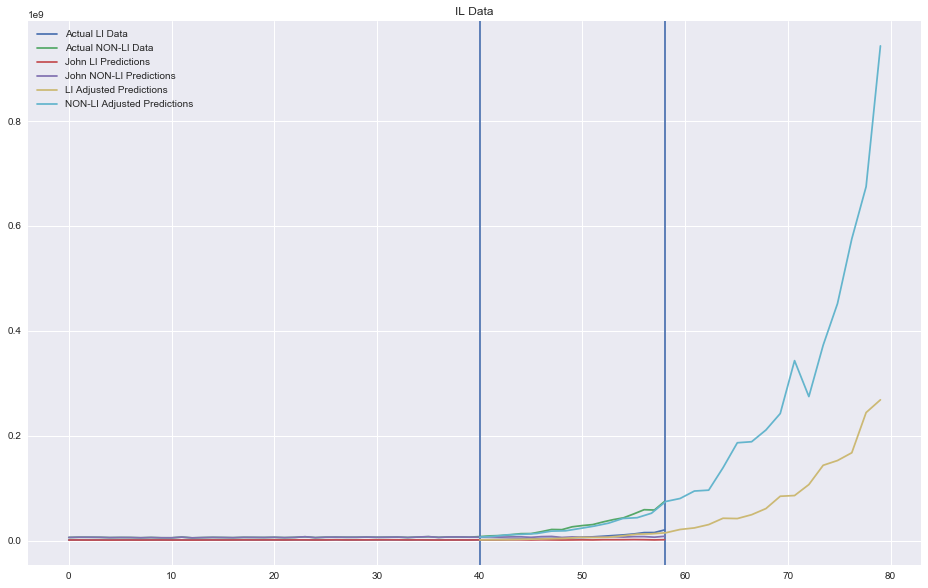

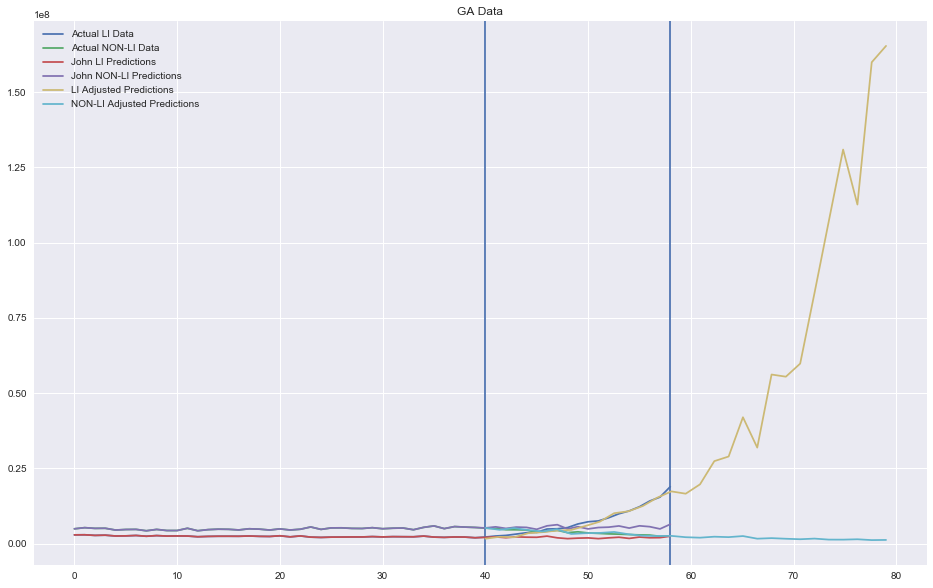

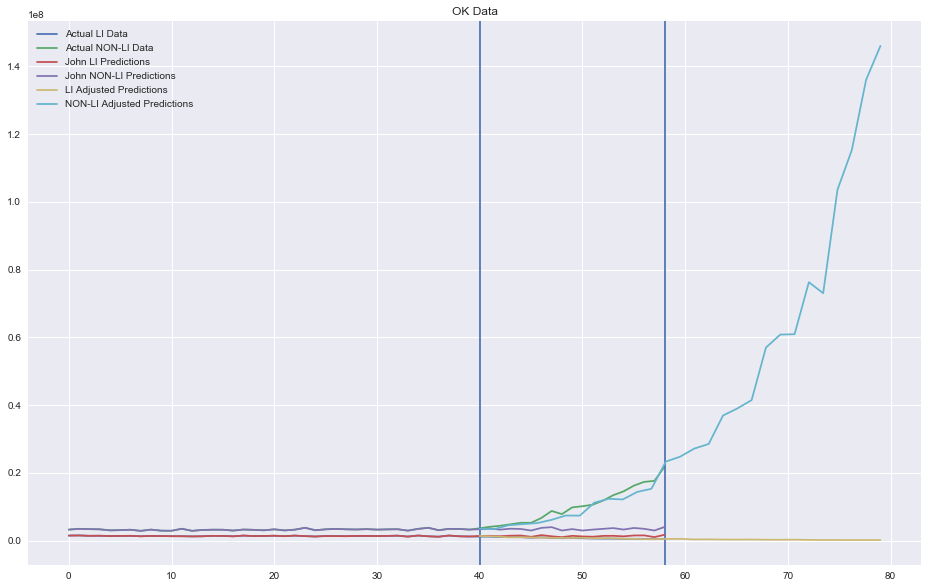

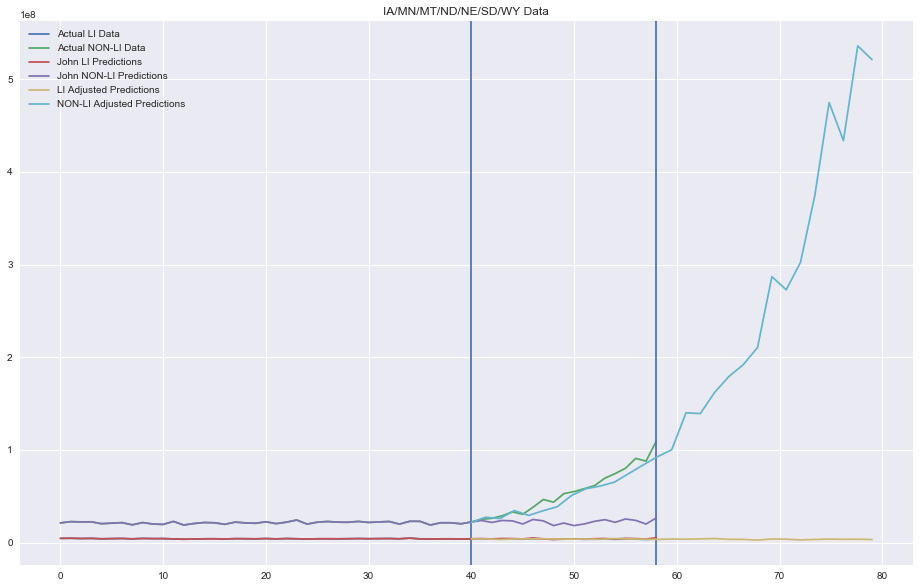

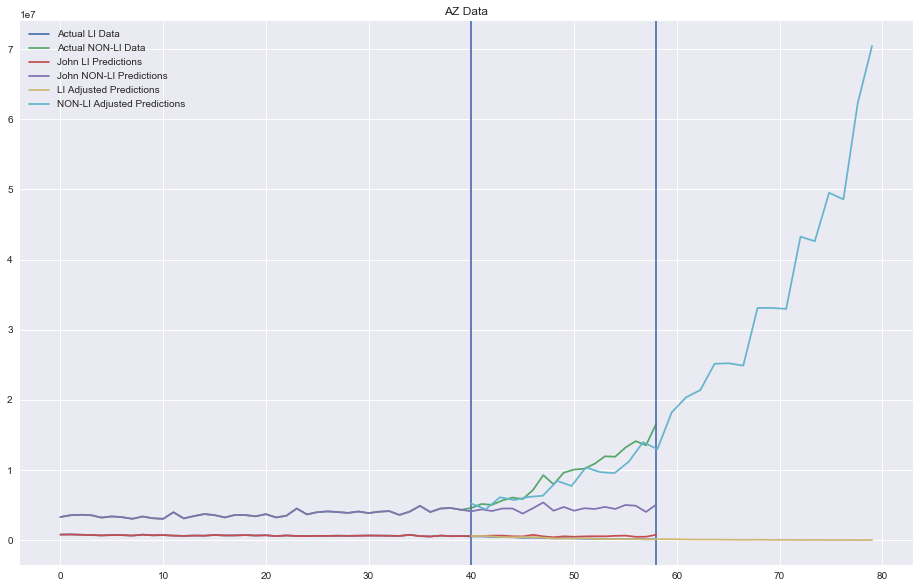

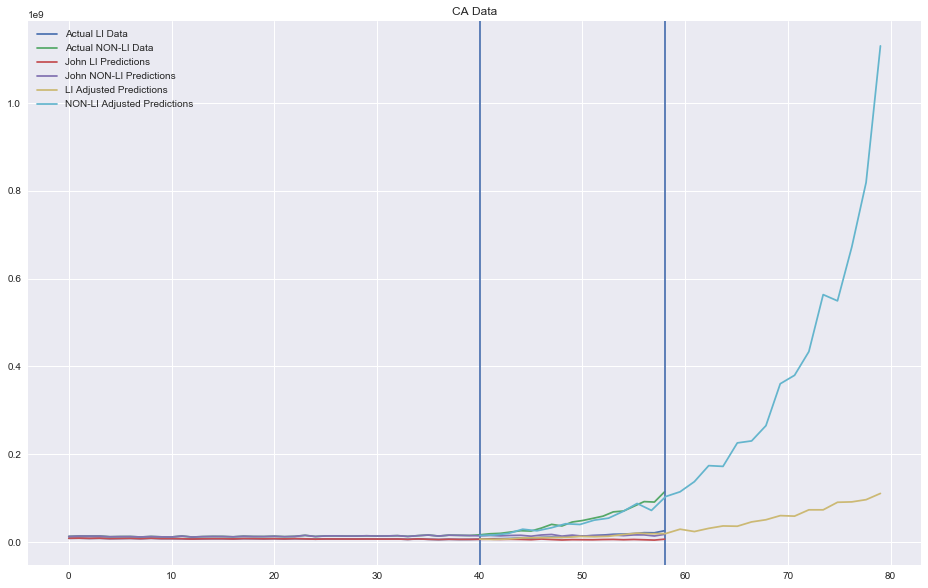

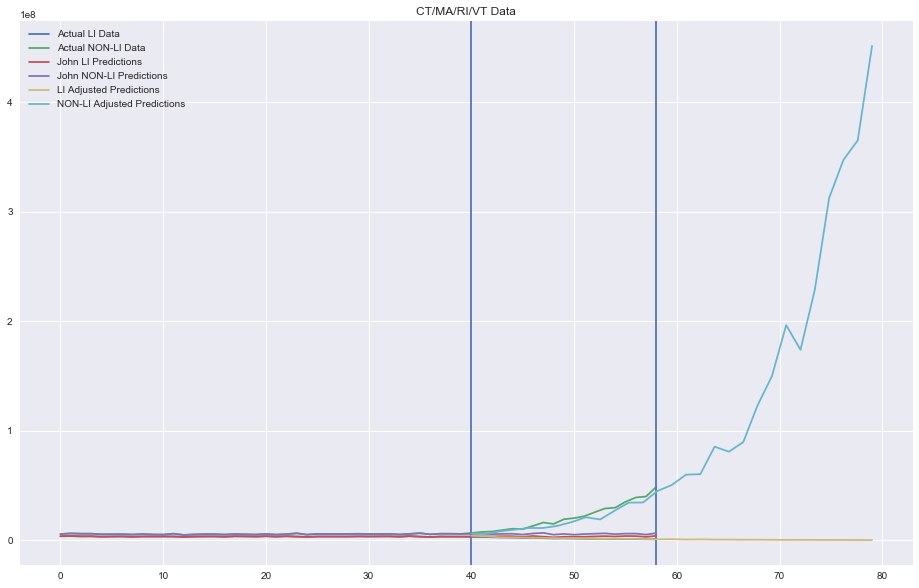

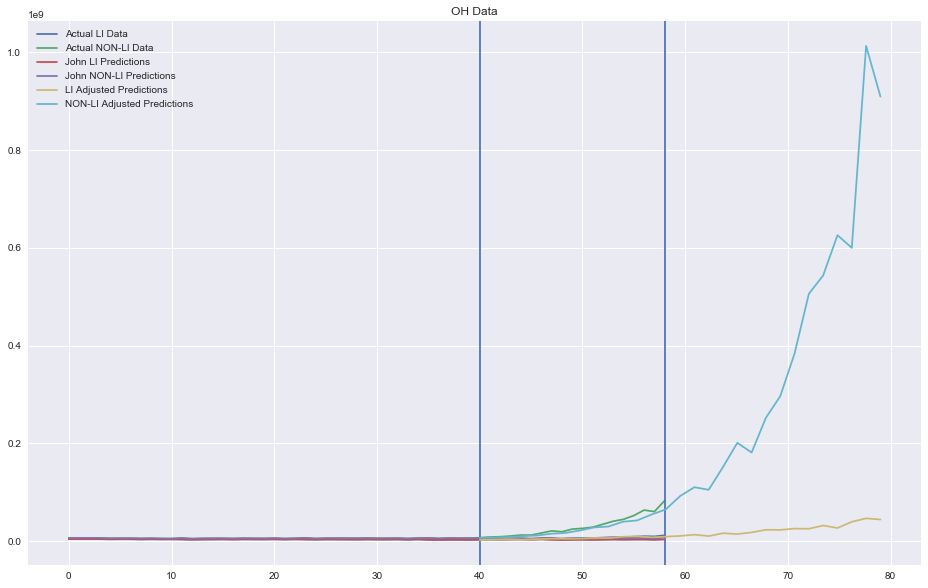

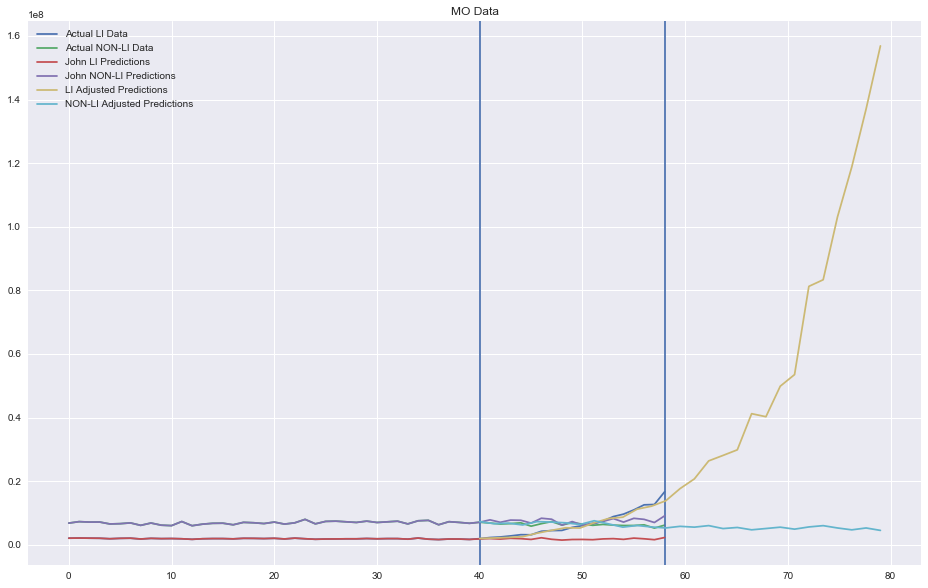

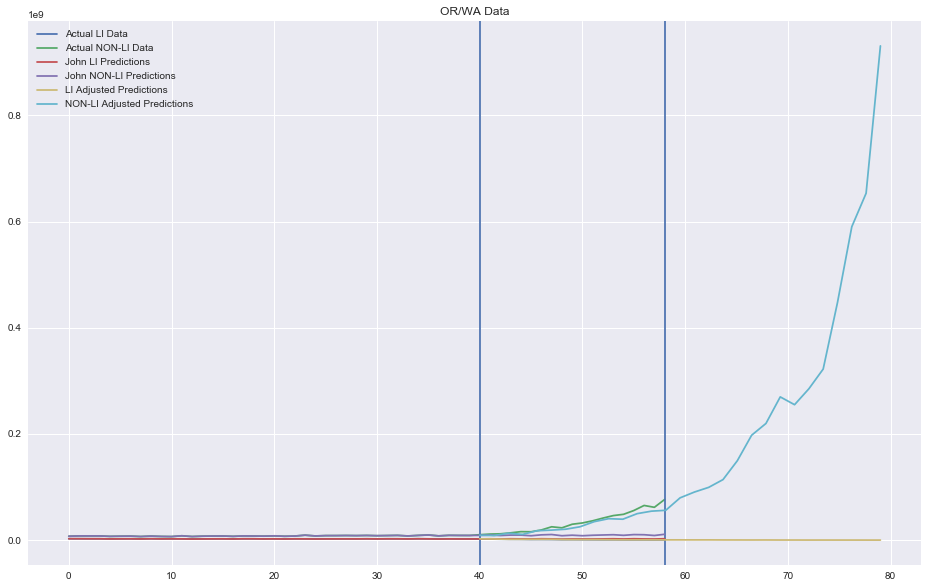

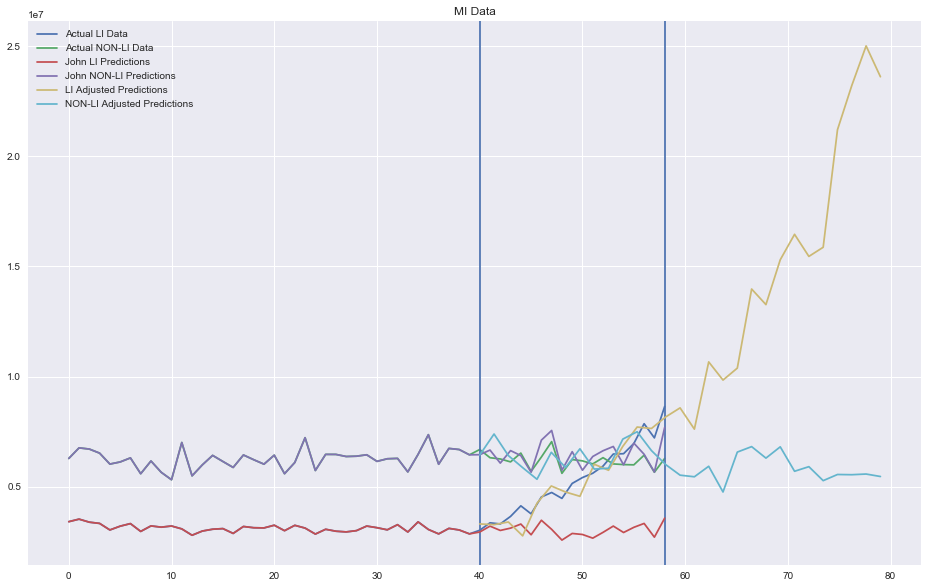

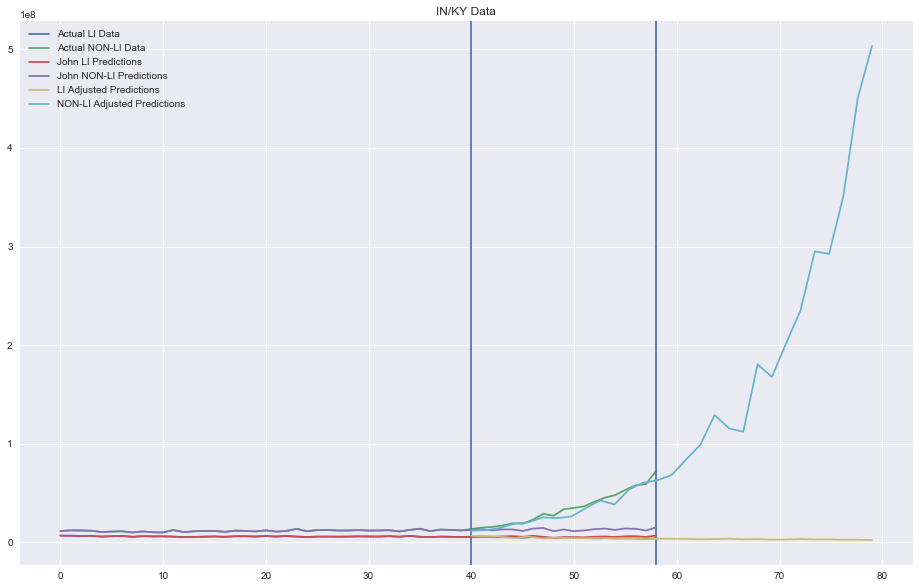

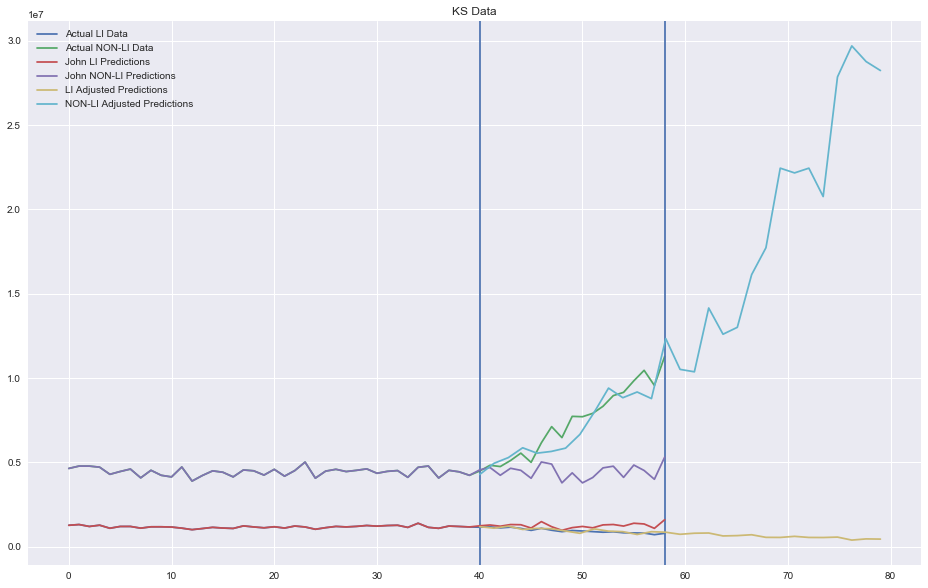

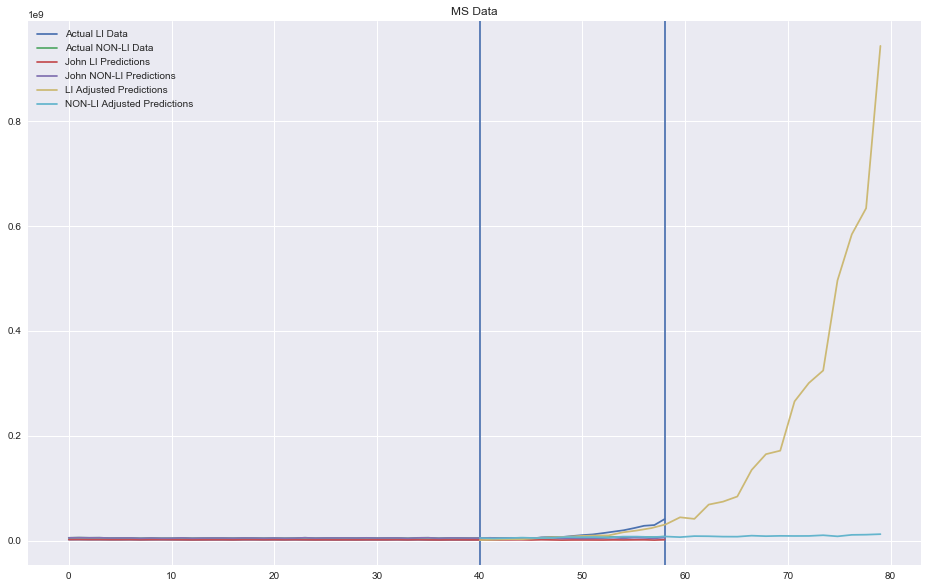

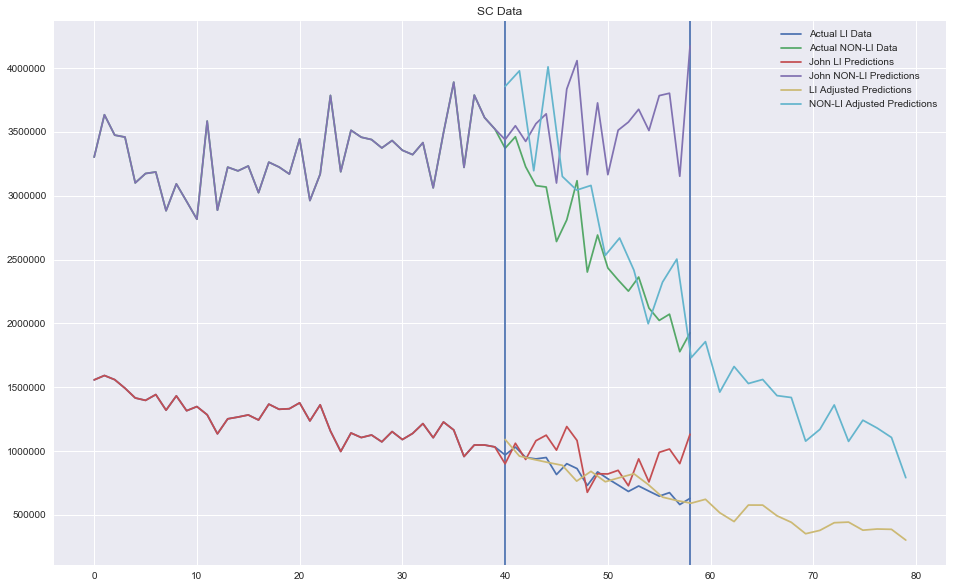

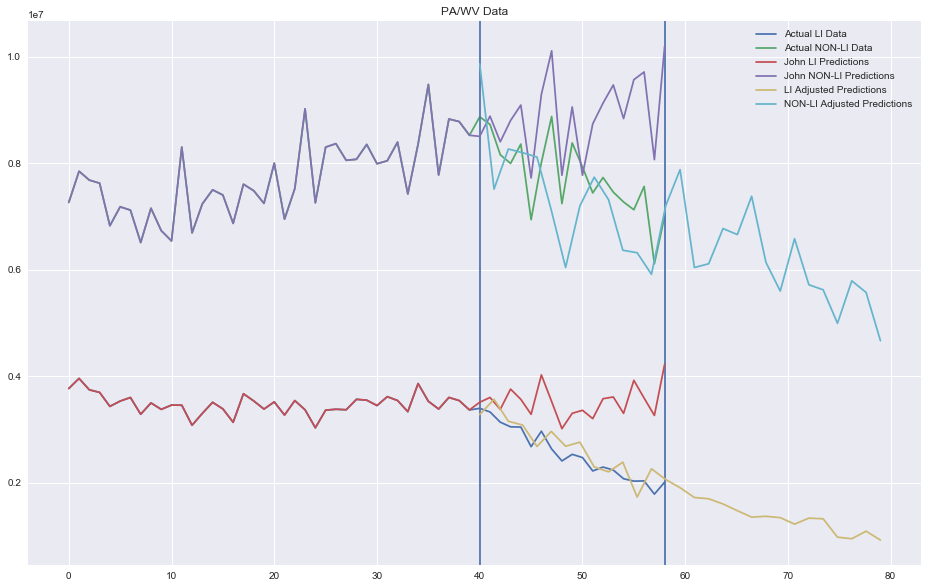

In [4]:
def state_graph(region):
    specified_region = region
    specified_region_allowed_amt_li = []
    specified_region_allowed_amt_nonli = []
    for i in range(0,len(state)):
        if state[i] == specified_region:
            if income[i] == 'LI':
                specified_region_allowed_amt_li.append(allowed_amt[i])
            else:
                specified_region_allowed_amt_nonli.append(allowed_amt[i])
        else:
            pass
    specified_regions_john_li_predictions = list(john_li_predictions.loc[specified_region,:])
    specified_regions_john_nonli_predictions = list(john_non_li_predictions.loc[specified_region,:])
    date_range = range(0,len(specified_region_allowed_amt_li))
    plt.figure(figsize=(16,10))
    plt.plot(date_range,specified_region_allowed_amt_li, label='Actual LI Data')
    plt.plot(date_range,specified_region_allowed_amt_nonli, label = 'Actual NON-LI Data')
    plt.axvline(x=40)
    plt.axvline(x=58)
    plt.plot(date_range,specified_region_allowed_amt_li[0:len(date_range)-\
            len(specified_regions_john_li_predictions)]+\
             specified_regions_john_li_predictions, label = 'John LI Predictions')

    plt.plot(date_range,specified_region_allowed_amt_nonli[0:len(date_range)-\
            len(specified_regions_john_li_predictions)]+\
             specified_regions_john_nonli_predictions, label = 'John NON-LI Predictions')

    t = range(41,60)
    [coeff_1, coeff_2] = np.polyfit(t,\
                np.log(specified_region_allowed_amt_li[len(date_range)-len(specified_regions_john_li_predictions):]),1)

    x_vals = np.linspace(40,79,29)
    y_vals = np.exp(coeff_2)*np.exp(coeff_1*x_vals)
    y_vals = [i+np.random.normal(0,i/10) for i in y_vals]
    plt.plot(x_vals,y_vals, label='LI Adjusted Predictions')


    t = range(41,60)
    [coeff_1, coeff_2] = np.polyfit(t,\
                np.log(specified_region_allowed_amt_nonli[len(date_range)-len(specified_regions_john_li_predictions):]),1)

    x_vals = np.linspace(40,79,29)
    y_vals = np.exp(coeff_2)*np.exp(coeff_1*x_vals)
    y_vals = [i+np.random.normal(0,i/10) for i in y_vals]
    plt.plot(x_vals,y_vals, label='NON-LI Adjusted Predictions')
    plt.title(specified_region + ' Data')
    plt.legend()
    plt.show()

    
for i in set(state):
    state_graph(i)